# Plot a profile over a region

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import io, os, sys, types

import yhc_module as yhc

xr.set_options(keep_attrs=True)  # keep attributes after xarray operation

## Open and read a netCDF data

In [57]:
#--- open data
datapath = "../data/"
filename = "data-am4_20010725_8xdaily-temp.nc"

files_input = datapath+"/"+filename

#--- use xarray to open the files
data = xr.open_dataset(files_input)
data

<xarray.Dataset>
Dimensions:  (phalf: 34, lat: 180, lon: 288, pfull: 33, time: 8)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.625 1.875 3.125 4.375 ... 355.6 356.9 358.1 359.4
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * phalf    (phalf) float64 1.0 4.0 8.186 13.79 ... 981.1 989.7 995.9 1e+03
  * time     (time) object 2001-07-25 01:30:00 ... 2001-07-25 22:30:00
Data variables:
    bk       (phalf) float32 ...
    pk       (phalf) float32 ...
    ps       (time, lat, lon) float32 ...
    temp     (time, pfull, lat, lon) float32 ...
Attributes:
    filename:              20010701.atmos_8xdaily.tile1.nc
    title:                 tt2-c96L33_am4p0_cm4amip_Jul2001
    associated_files:      area: 20010701.grid_spec.nc
    grid_type:             regular
    grid_tile:             N/A
    code_release_version:  19.1
    git_hash:              c97c1f6afab0df3545ee82c337d51accc4205bc3
    creationtime:          Tue Jun 28 20:36:11 2022
    hostname:              an204
    history:               Fri Jul  1 19:15:53 2022: ncks -v pk,bk,ps,temp cm...
    NCO:                   "4.5.4"

## select data region and time

In [58]:
#--- variable of interest
var = data.temp
#print(var)
#print(var.time)

#--- select region & time
region = "DYCOMS"
lon_slice, lat_slice = yhc.get_region_latlon(region)

var_region = var.sel(time="2001-07-25 07:30:00", lat=lat_slice, lon=lon_slice)
var_region


<xarray.DataArray 'temp' (time: 1, pfull: 33, lat: 2, lon: 3)>
array([[[[259.11816, 259.1379 , 259.14694],
         [259.34808, 259.365  , 259.36508]],

        [[239.17023, 239.15256, 239.11075],
         [239.3663 , 239.36343, 239.34001]],

        [[232.05412, 232.04799, 232.05786],
         [232.12967, 232.12656, 232.12323]],

        [[227.74933, 227.7398 , 227.76312],
         [227.97519, 227.93398, 227.91   ]],

        [[225.05345, 224.96754, 224.81796],
         [225.20178, 225.13669, 225.01009]],

        [[221.91278, 221.87863, 221.8707 ],
         [221.97035, 221.90895, 221.88979]],

        [[218.44699, 218.46814, 218.37933],
         [218.56718, 218.622  , 218.56848]],

        [[212.19804, 212.25761, 212.47281],
         [212.74968, 212.84206, 213.02861]],

        [[206.85782, 206.80673, 206.833  ],
         [207.53648, 207.41153, 207.41577]],

        [[201.76723, 201.36687, 201.0116 ],
         [202.53163, 202.02357, 201.46797]],

        [[204.08775, 203.75864, 203.62067],
         [204.49614, 204.04353, 203.85225]],

        [[211.3932 , 211.37575, 211.28728],
         [211.35474, 211.42361, 211.30835]],

        [[221.5455 , 221.73198, 221.89673],
         [221.29242, 221.44466, 221.68636]],

        [[232.52379, 232.41333, 232.20413],
         [232.54346, 232.4206 , 232.23187]],

        [[243.17358, 243.23099, 243.35123],
         [243.24437, 243.27446, 243.21053]],

        [[253.45522, 253.50427, 253.3799 ],
         [253.45126, 253.71727, 253.91614]],

        [[262.3561 , 262.64496, 262.68723],
         [262.53842, 262.87827, 262.98322]],

        [[270.73834, 271.12317, 271.47427],
         [270.75037, 271.27042, 271.65063]],

        [[277.928  , 278.67673, 279.37262],
         [277.37424, 278.22922, 279.0595 ]],

        [[283.3953 , 284.17224, 285.0411 ],
         [282.52438, 283.27707, 284.36288]],

        [[287.84253, 288.35037, 289.34927],
         [287.5322 , 288.07294, 288.88235]],

        [[292.40918, 292.89157, 293.71692],
         [291.82144, 292.72534, 293.46585]],

        [[295.3306 , 296.45032, 296.95444],
         [294.94278, 296.01782, 296.7452 ]],

        [[298.27167, 298.8148 , 299.59573],
         [297.67337, 298.23218, 299.3777 ]],

        [[299.46732, 300.62732, 301.51773],
         [298.86526, 299.69208, 300.97372]],

        [[300.37546, 300.7763 , 301.52533],
         [299.832  , 300.18817, 300.97424]],

        [[300.07385, 301.62726, 301.88397],
         [298.63754, 300.75842, 301.38373]],

        [[297.75354, 299.48828, 301.03253],
         [296.74628, 298.58664, 300.51065]],

        [[295.2099 , 298.47864, 300.56314],
         [294.38898, 297.53387, 299.75815]],

        [[290.66815, 290.75613, 293.64862],
         [288.81296, 290.37418, 294.06894]],

        [[290.50272, 290.77753, 292.07895],
         [289.39288, 290.01788, 290.94385]],

        [[291.01044, 291.21115, 292.32736],
         [289.99246, 290.44095, 291.24484]],

        [[291.44244, 291.6301 , 292.6263 ],
         [290.45935, 290.8524 , 291.5634 ]]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 30.5 31.5
  * lon      (lon) float64 236.9 238.1 239.4
  * pfull    (pfull) float64 2.164 5.845 10.75 17.11 ... 975.6 985.4 992.8 997.9
  * time     (time) object 2001-07-25 07:30:00
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 400.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2

## Create profiles

In [69]:
#--- get pressure levels
ps_region = data.ps.sel(time="2001-07-25 07:30:00", lat=lat_slice, lon=lon_slice)
pfull_region = yhc.mlevs_to_plevs(ps_region)

#--- do domain average weighted by latitudes
var_region_ijavg = yhc.wgt_avg(var_region)
pfull_region_ijavg = yhc.wgt_avg(pfull_region)

#help(yhc.wgt_avg)

#var_region_ijavg.coords["pfull"] = pfull_region_ijavg.plev[:]

#--- pass pressure levels to variable's vertical coordinate
pp = xr.DataArray.to_numpy(pfull_region_ijavg[0,:])  # convert the Xarray data to a numpy data
var_region_ijavg.coords["pfull"] = pp / 100.  # change unit to Pa

print(var_region_ijavg)
print(pfull_region_ijavg)

pfull
<xarray.DataArray 'temp' (time: 1, pfull: 33)>
array([[259.24627174, 239.24999076, 232.08971297, 227.84474229,
        225.03080719, 221.90510619, 218.50828253, 212.58999021,
        207.14192371, 201.69317069, 203.9756881 , 211.35712822,
        221.60026297, 232.38948113, 243.24754864, 253.57002483,
        262.68074406, 271.1675737 , 278.441202  , 283.7976328 ,
        288.33919891, 292.83926233, 296.07442677, 298.66212653,
        300.19239103, 300.61338869, 300.72991451, 299.02177768,
        297.65769299, 291.38975105, 290.62159351, 291.04037604,
        291.43146354]])
Coordinates:
  * pfull    (pfull) float64 2.5 6.093 10.99 ... 1.001e+03 1.008e+03 1.014e+03
  * time     (time) object 2001-07-25 07:30:00
Attributes:
    long_name:      temperature
    units:          K
    valid_range:    [100. 400.]
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
    interp_method:  conserve_order2
<xarray.DataArray (time: 1, plev: 33)>
array([[   250.

## Plot

Xaaray plotting - https://docs.xarray.dev/en/stable/user-guide/plotting.html

<xarray.DataArray 'pfull' (pfull: 33)>
array([   2.5     ,    6.093011,   10.98744 ,   17.353405,   25.37718 ,
         35.527155,   48.50506 ,   65.037085,   85.818535,  111.496301,
        142.676886,  179.9545  ,  223.890149,  274.970007,  333.448406,
        398.831918,  469.123212,  540.721687,  609.693945,  673.303529,
        730.35748 ,  780.633815,  824.347727,  861.932173,  893.956581,
        921.046257,  943.783068,  962.694666,  978.252287,  990.831426,
       1000.765967, 1008.276015, 1013.521215])
Coordinates:
  * pfull    (pfull) float64 2.5 6.093 10.99 ... 1.001e+03 1.008e+03 1.014e+03
Attributes:
    long_name:  Pressure
    units:      Pa


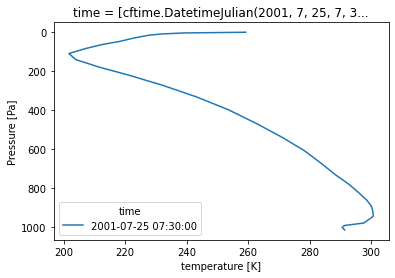

In [78]:
#with xr.set_options(keep_attrs=True):
var1 = var_region_ijavg
var1.pfull.attrs['long_name'] = "Pressure"
var1.pfull.attrs['units'] = "Pa"

print(var1.pfull)

var1.plot.line(y="pfull", yincrease=False)